In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore")

"Successfully imported all the files"

'Successfully imported all the files'

# Credit Card Fraud Detection using python

### Workflow

```
Credit Card Data -> Data pre-processing -> Data Analysis -> Train/Test Split -> Logistic Regression Model -> Evaluation
```

In [86]:
# Importing the data
import os
for dirname, _, filenames in os.walk('./Datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Datasets/Copy of sonar data.csv
./Datasets/creditcard.csv


In [87]:
df = pd.read_csv('./Datasets/creditcard.csv')

In [88]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


On first look we can see the data have many ambiguous columns, as we dont know the meaning of each column, we wouldnot be dropping any column

In [89]:
display(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Every column is eithe **int** or **float** so we dont have to change the data type, the last column **Class** is the target variable so we doont have to change its data type.

In [90]:
display(df.describe())
display(df.shape)
display(df.isna().sum().max())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


(284807, 31)

0

There are no null Values <br>
**Average of transaction:** An average of 88$ of transaction is done <br>
We have to convert class to categorical value

0    284315
1       492
Name: Class, dtype: int64

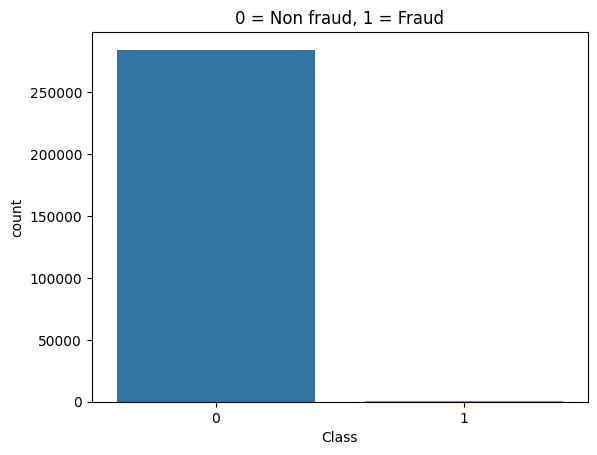

In [91]:
df['Class'] = df['Class'].astype('category')
display(df.Class.value_counts())
df.Class.value_counts(normalize=True)

legit  = df[df.Class == 0]
fraud = df[df.Class == 1]

sns.countplot(data=df, x=df.Class)
plt.title("0 = Non fraud, 1 = Fraud")
plt.show()

**99%** of the credit cards are non fraud and remaining are fraud. This is not a healthy distribution. So we need to make a machine learning model that can identify the fraud using given patterns and independent of the quantity of the cards.

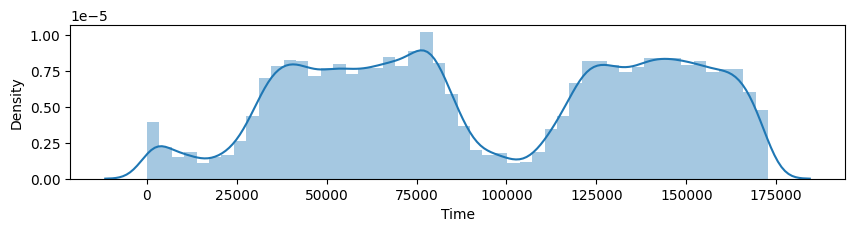

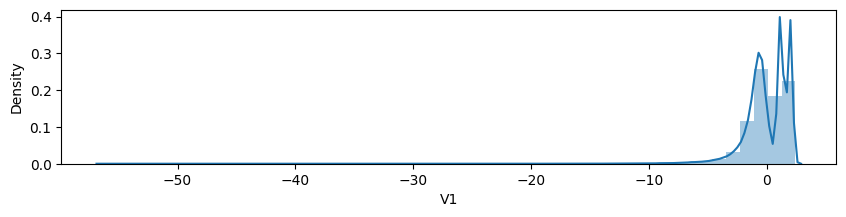

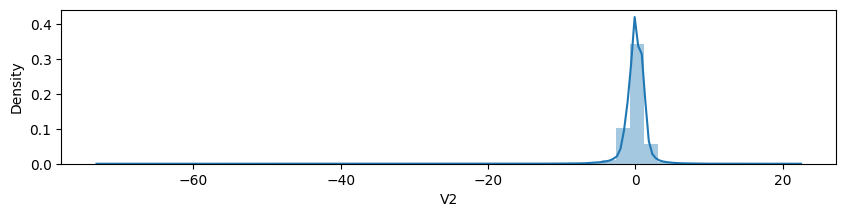

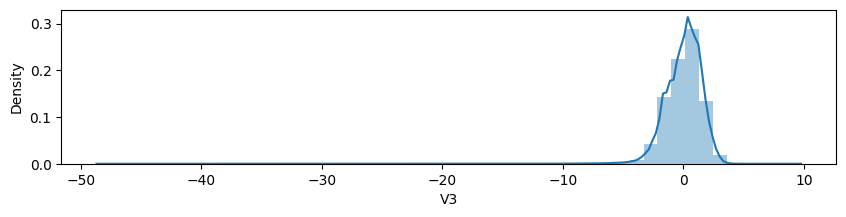

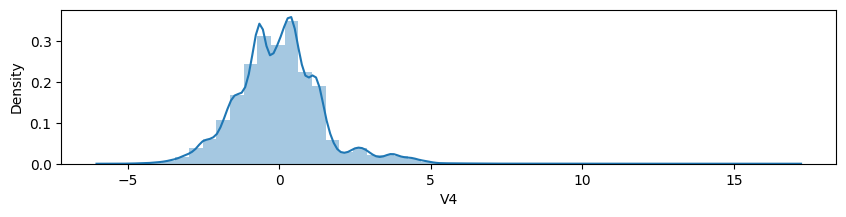

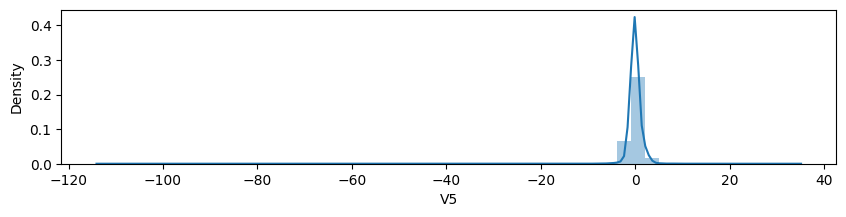

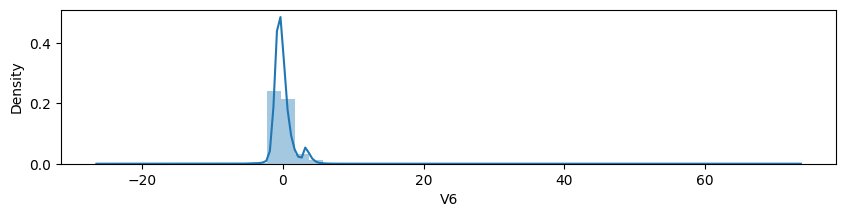

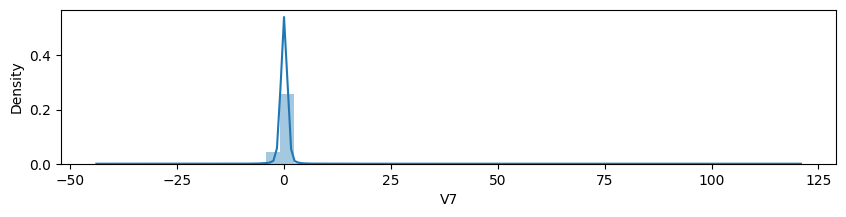

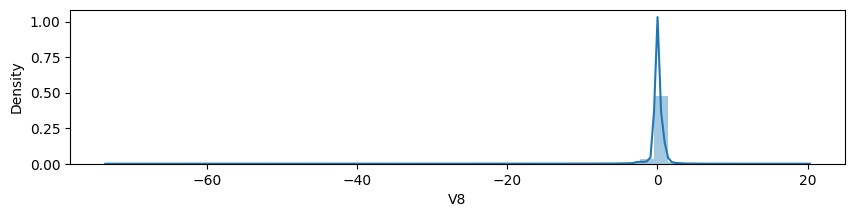

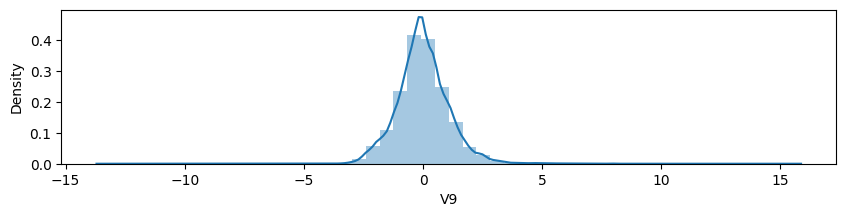

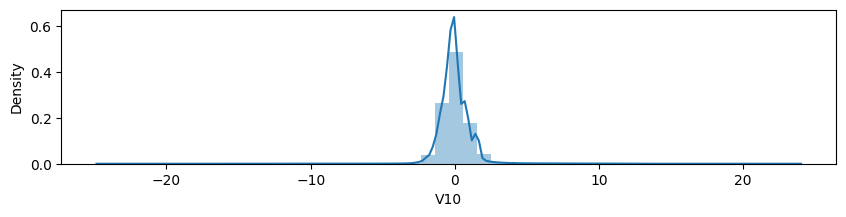

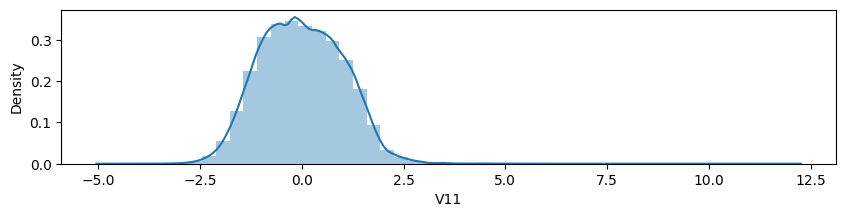

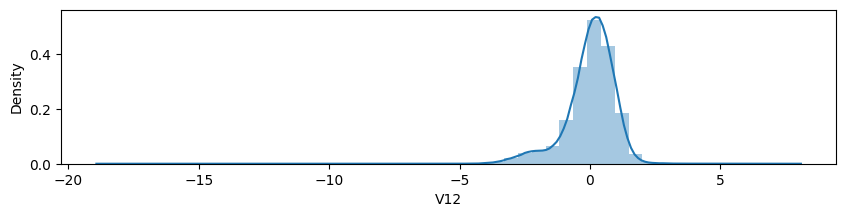

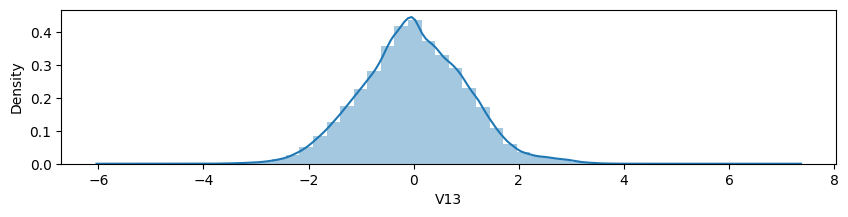

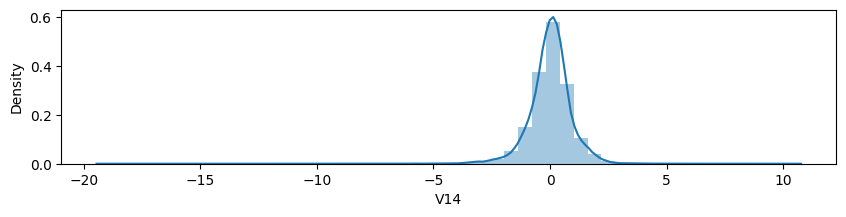

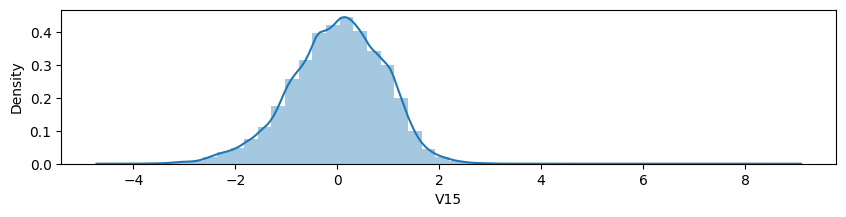

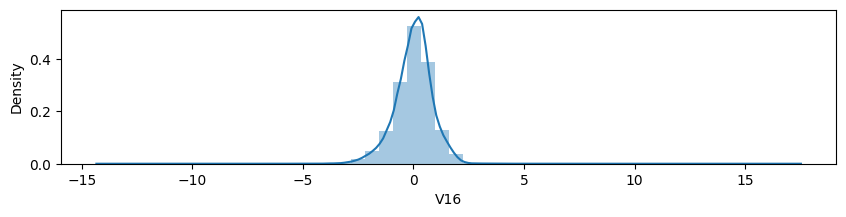

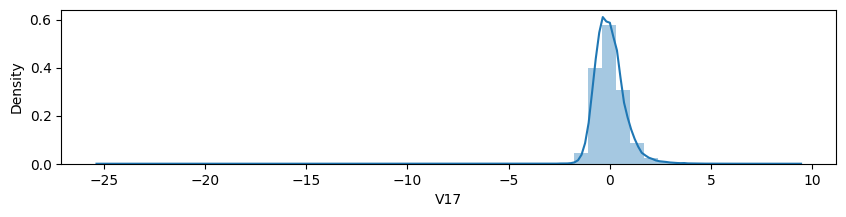

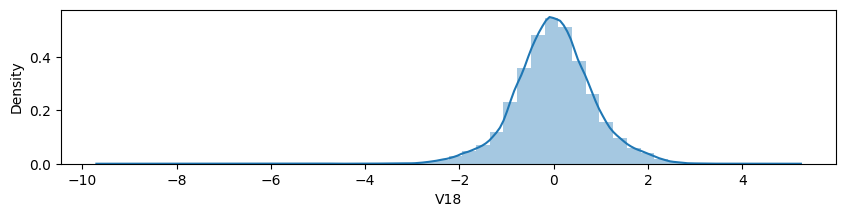

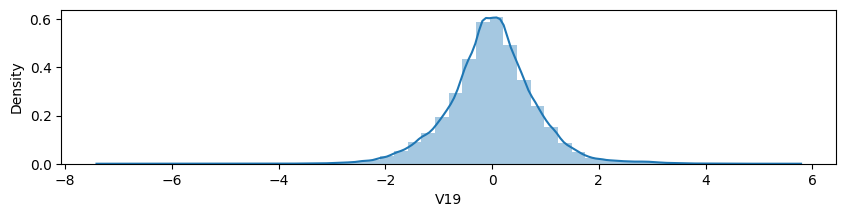

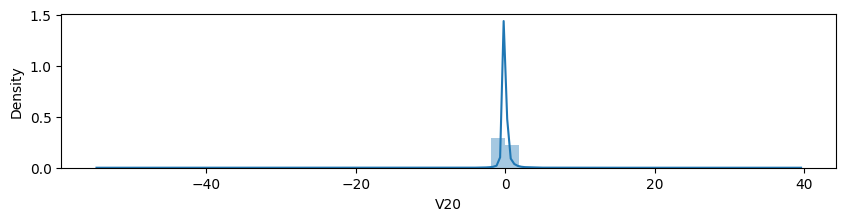

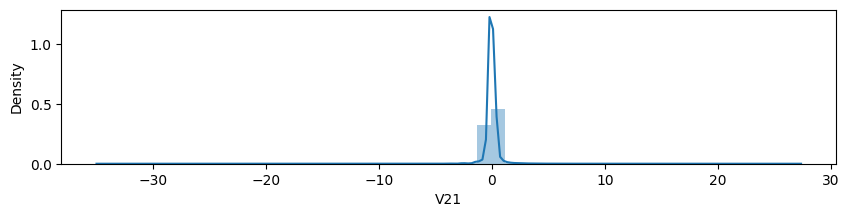

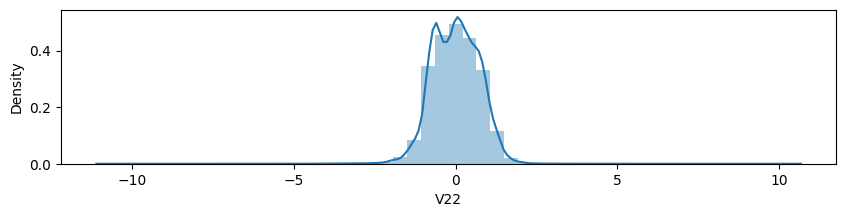

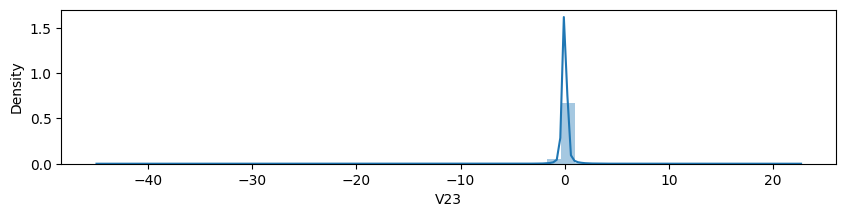

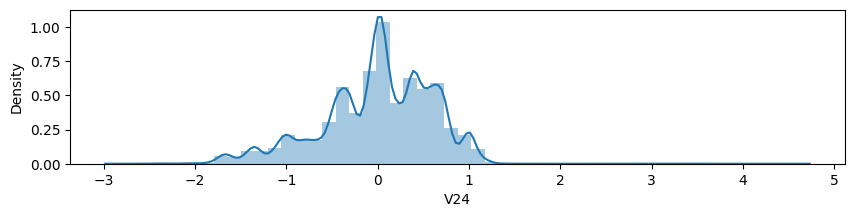

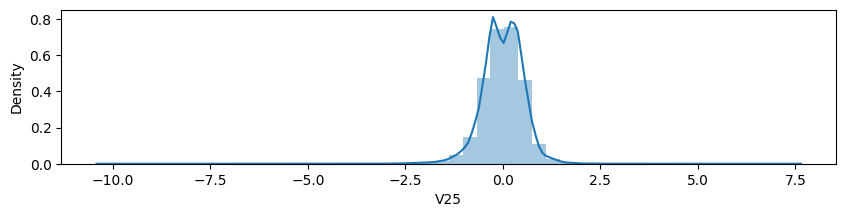

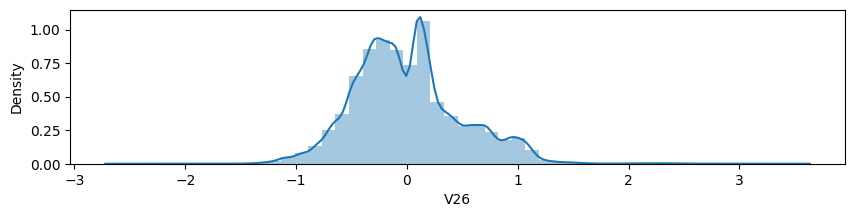

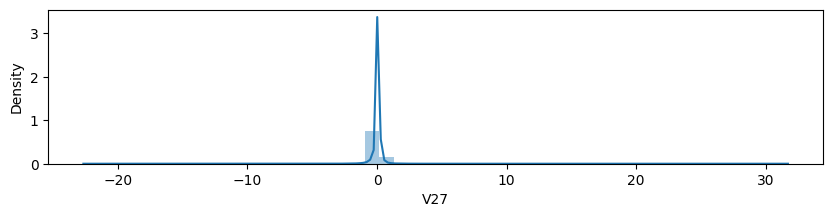

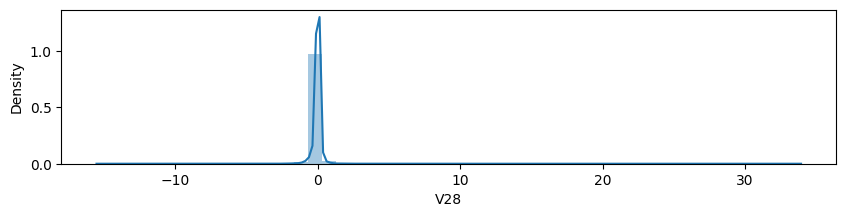

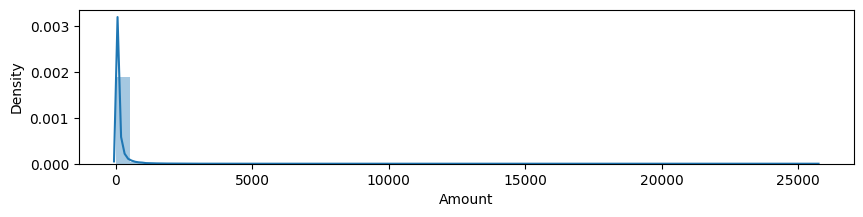

In [92]:
# Checking the distribution
from scipy.stats import skew
col = df.columns[:-1]
for i in col:
    plt.figure(figsize=(10, 2))
    sns.distplot(df[i])
    plt.show()

In [93]:
# Checking for duplicated entries
df.duplicated().sum()

1081

In [94]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

# Seperating fraud and non fraud
We have to fix the proportion of the fraud and non fraud and make a healthy distribution.
That way we can prevent bias in the system.<br>
After seperating we **concat** the two data frames to get a  sampled dataframe `df_sampled`

In [95]:
legit = df[df['Class']==0]
fraud = df[df['Class']==1]
display(legit.head())
display(fraud.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [96]:
# Sampling from the legit card df
legit_sampled = legit.sample(n=473,random_state=123)
legit_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152702,97442.0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95,0
123440,76926.0,-0.977923,1.503292,1.209271,0.569170,0.458301,-0.279697,1.091572,-0.519330,0.329349,...,0.018738,0.616262,-0.181989,0.082257,-0.251208,-0.373817,-0.087901,-0.094538,8.00,0
124838,77440.0,-0.591357,-0.915593,1.534353,-2.073147,-1.297029,-1.367997,0.075569,-0.215726,-2.354288,...,0.034130,0.115894,0.368135,0.857198,-0.398040,-0.455122,0.095367,0.170694,131.67,0
272527,165136.0,2.018371,0.063850,-1.617806,0.352243,0.321795,-0.679631,0.040873,-0.063150,0.323615,...,-0.308345,-0.852953,0.358594,0.651329,-0.336056,0.144834,-0.070685,-0.040174,1.79,0
176571,122825.0,-1.238054,-0.389592,2.386836,-1.107162,0.190922,0.203423,0.354894,0.143359,0.268802,...,0.110830,0.098117,-0.094508,-0.502477,0.354859,0.390893,-0.220871,-0.162397,117.71,0


In [97]:
# Concatening the two data frames
df_sampled = pd.concat([legit_sampled,fraud], axis=0)
df_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
152702,97442.0,1.950375,-0.732294,-1.204485,-0.568751,1.506499,4.067329,-1.619239,1.056602,2.505489,...,-0.114257,-0.055509,0.364732,0.669422,-0.585260,0.462775,-0.020554,-0.049449,15.95,0
123440,76926.0,-0.977923,1.503292,1.209271,0.569170,0.458301,-0.279697,1.091572,-0.519330,0.329349,...,0.018738,0.616262,-0.181989,0.082257,-0.251208,-0.373817,-0.087901,-0.094538,8.00,0
124838,77440.0,-0.591357,-0.915593,1.534353,-2.073147,-1.297029,-1.367997,0.075569,-0.215726,-2.354288,...,0.034130,0.115894,0.368135,0.857198,-0.398040,-0.455122,0.095367,0.170694,131.67,0
272527,165136.0,2.018371,0.063850,-1.617806,0.352243,0.321795,-0.679631,0.040873,-0.063150,0.323615,...,-0.308345,-0.852953,0.358594,0.651329,-0.336056,0.144834,-0.070685,-0.040174,1.79,0
176571,122825.0,-1.238054,-0.389592,2.386836,-1.107162,0.190922,0.203423,0.354894,0.143359,0.268802,...,0.110830,0.098117,-0.094508,-0.502477,0.354859,0.390893,-0.220871,-0.162397,117.71,0


In [98]:
df_sampled.Class.value_counts()

0    473
1    473
Name: Class, dtype: int64

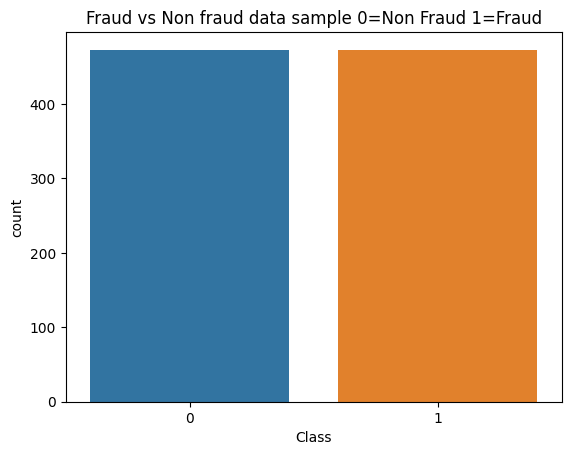

In [99]:
sns.countplot(x='Class', data=df_sampled)
plt.title('Fraud vs Non fraud data sample 0=Non Fraud 1=Fraud')
plt.show()

Now we have a healthy distribution between fraud and non fraud.<br>
This helps to prevent the bias in our model

In [100]:
# Checking the correlation
df_sampled.corr().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.238828,-0.225145,0.158910,-0.205721,0.304203,0.154159,0.219506,-0.194447,0.144282,0.217458,-0.312890,0.267171,-0.086973,0.170537,-0.140506,0.236704,0.243637,0.266364,-0.082508,-0.043216,-0.061467,0.145778,0.073692,-0.009743,-0.182077,-0.068907,-0.146700,0.016030,0.006174
V1,0.238828,1.000000,-0.789017,0.874973,-0.604004,0.860659,0.359193,0.869381,-0.230963,0.655324,0.737124,-0.523154,0.586059,-0.061654,0.438327,0.106931,0.630071,0.677675,0.673585,-0.333408,-0.340939,0.121337,-0.090478,-0.016835,-0.052025,-0.096074,0.055041,0.103771,0.190793,-0.039236
V2,-0.225145,-0.789017,1.000000,-0.861676,0.694693,-0.778028,-0.368324,-0.837333,0.155587,-0.703583,-0.771429,0.625029,-0.672431,0.067069,-0.568471,-0.138575,-0.626567,-0.645315,-0.614619,0.245303,0.362173,-0.110922,0.080470,0.020432,-0.006227,0.090028,-0.001903,-0.105477,0.044497,-0.261660
V3,0.158910,0.874973,-0.861676,1.000000,-0.772380,0.838461,0.492760,0.881087,-0.294805,0.755095,0.847622,-0.712220,0.757456,-0.070928,0.656790,0.129426,0.719741,0.731723,0.695396,-0.337608,-0.377656,0.067892,-0.077599,-0.007680,0.033634,-0.089956,-0.025681,0.008006,0.099387,0.000876
V4,-0.205721,-0.604004,0.694693,-0.772380,1.000000,-0.554065,-0.429469,-0.718721,0.147436,-0.791536,-0.795486,0.792943,-0.833260,0.032644,-0.800693,-0.113140,-0.719984,-0.702501,-0.641399,0.318240,0.290008,-0.033379,0.120727,0.009715,-0.105753,-0.022143,0.147472,0.042908,-0.051141,-0.031832
V5,0.304203,0.860659,-0.778028,0.838461,-0.554065,1.000000,0.286673,0.828720,-0.320877,0.644462,0.736045,-0.509076,0.592815,-0.115446,0.411279,0.067753,0.677258,0.736007,0.734539,-0.409675,-0.360050,0.081287,-0.102199,-0.082312,-0.149188,-0.095136,0.047756,0.119933,0.141423,-0.131448
V6,0.154159,0.359193,-0.368324,0.492760,-0.429469,0.286673,1.000000,0.352316,-0.550440,0.346320,0.423477,-0.508379,0.505971,-0.071155,0.563339,-0.055469,0.442410,0.428106,0.367295,-0.205967,0.021120,-0.241403,0.204577,0.303718,-0.012958,-0.133152,-0.025819,-0.252816,-0.086467,0.261042
V7,0.219506,0.869381,-0.837333,0.881087,-0.718721,0.828720,0.352316,1.000000,-0.054258,0.762186,0.869102,-0.639281,0.720527,-0.036648,0.543560,0.162446,0.747663,0.779266,0.767452,-0.387763,-0.416887,0.215096,-0.233349,0.006626,-0.043594,0.069765,0.003138,0.159067,0.141006,0.158548
V8,-0.194447,-0.230963,0.155587,-0.294805,0.147436,-0.320877,-0.550440,-0.054258,1.000000,-0.092447,-0.107663,0.249517,-0.216263,0.239359,-0.276435,0.151963,-0.266551,-0.291454,-0.264963,0.229753,-0.196168,0.432849,-0.386949,-0.293793,0.035805,0.291275,0.025557,0.395039,0.075326,-0.004828
V9,0.144282,0.655324,-0.703583,0.755095,-0.791536,0.644462,0.346320,0.762186,-0.092447,1.000000,0.832433,-0.685739,0.752820,-0.012759,0.686906,0.111526,0.730007,0.749113,0.701848,-0.345167,-0.394854,0.159428,-0.228934,-0.061836,0.065221,-0.000112,-0.107533,0.069087,0.084545,0.000314


In [101]:
# Seperating target and feature variables
X = df_sampled.drop(columns=['Class'], axis=1)
X.head()
y = df_sampled['Class']
y.head()

# Splitting the train test model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y, test_size=0.2)

In [102]:
# Fitting logistic regression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9421052631578948

### Accuracy on Logistic Regression
> 94.21%

In [112]:
# Tuning the hyper parameters
from sklearn.metrics import accuracy_score
for x in range(0, 1000, 100):
    # Fitting logistic regression
    lr = LogisticRegression(max_iter=x)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy at {x}:{accuracy}')


Accuracy at 0:0.5
Accuracy at 100:0.9421052631578948
Accuracy at 200:0.9421052631578948
Accuracy at 300:0.9421052631578948
Accuracy at 400:0.9421052631578948
Accuracy at 500:0.9421052631578948
Accuracy at 600:0.9421052631578948
Accuracy at 700:0.9421052631578948
Accuracy at 800:0.9421052631578948
Accuracy at 900:0.9421052631578948


The accuracy remains constatnt even though we change the hyperparameters.

Accuracy on `LogisticRegression`:
> 94.21%

# Data Preprocessing
We perform **standardization** using the `z-score` formula which is given by:<br>
## z = (value-mean)/s.d

In [105]:
# performing normalization
# copy the data
df_z_scaled = X.copy()

# apply normalization techniques
for column in df_z_scaled.columns:

    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()

# view normalized data
display(df_z_scaled.head())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
152702,0.224118,0.788913,-0.682680,0.360353,-0.866061,0.748699,2.930748,0.172864,0.150116,1.611194,...,-0.317311,-0.162154,-0.111879,0.336753,1.285026,-0.930602,0.886510,-0.153130,-0.211423,-0.377217
123440,-0.201190,0.239520,-0.052139,0.761923,-0.509596,0.492064,0.288967,0.659940,-0.237730,0.673956,...,0.208291,-0.095857,0.577264,-0.127016,0.231729,-0.435718,-0.843839,-0.226893,-0.321859,-0.408165
124838,-0.190534,0.312046,-0.734379,0.816006,-1.337330,0.062299,-0.372416,0.477385,-0.163012,-0.481855,...,-0.254904,-0.088183,0.063957,0.339640,1.621873,-0.653244,-1.012005,-0.026165,0.327780,0.073260
272527,1.627453,0.801670,-0.458130,0.291590,-0.577550,0.458643,0.045918,0.471151,-0.125462,0.671486,...,-0.381754,-0.258908,-0.929946,0.331547,1.252571,-0.561417,0.228902,-0.208037,-0.188704,-0.432340
176571,0.750322,0.190716,-0.586022,0.957831,-1.034724,0.426600,0.582569,0.527574,-0.074639,0.647879,...,0.107280,-0.049949,0.045720,-0.052808,-0.817207,0.462145,0.737835,-0.372532,-0.488069,0.018916


After making standard values every value falls within the same range and follow the standard normal distribution
### Range of every value = `[-1,1]`

In [106]:
# Fitting the model again
print("Accuracy scores: ")
X = df_z_scaled
y = df_sampled['Class']
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(X, y, test_size=0.2, random_state=123)
for x in range(0, 1000, 100):
    # Fitting logistic regression
    lr = LogisticRegression(max_iter=x)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy at {x}: {accuracy}')


Accuracy scores: 
Accuracy at 0: 0.5
Accuracy at 100: 0.9421052631578948
Accuracy at 200: 0.9421052631578948
Accuracy at 300: 0.9421052631578948
Accuracy at 400: 0.9421052631578948
Accuracy at 500: 0.9421052631578948
Accuracy at 600: 0.9421052631578948
Accuracy at 700: 0.9421052631578948
Accuracy at 800: 0.9421052631578948
Accuracy at 900: 0.9421052631578948


The accuracy remains same on every hyperparameter value.

Accuracy for `LogisticRegression` on standardized values:
> 94.21%

In [107]:
# Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Seperating target and feature variables
X = df_sampled.drop(columns=['Class'], axis=1)
X.head()
y = df_sampled['Class']
y.head()

# Splitting the train test model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y, test_size=0.2)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9578947368421052

### Improvement in accuracy
On using RandomForestClassifier we saw improvement in the accuracy.<br>
Accuracy on `RandomForestClassifier` : 
> 95.78%

In [108]:
# Tuning the hyperparameters using the randomized search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators':randint(low=1, high=100), 'max_depth':randint(low=1, high=10),'min_samples_split':randint(low=2, high=100),'min_samples_leaf':randint(low=1, high=10),'max_features':randint(low=1, high=10)}

rnd_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=123)

rnd_search.fit(X_train, y_train)

rnd_search.best_params_

{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 93}

In [109]:
# Fitting using the above hyperparameters
rf = RandomForestClassifier(n_estimators=93, max_depth=5, max_features=9, min_samples_leaf=1, min_samples_split=9)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9526315789473684

In [110]:
# Tuning in a standardized data set
param_dist = {'n_estimators': randint(low=1, high=100), 'max_depth': randint(low=1, high=10), 'min_samples_split': randint(
    low=2, high=100), 'min_samples_leaf': randint(low=1, high=10), 'max_features': randint(low=1, high=10)}

rnd_search = RandomizedSearchCV(estimator=RandomForestClassifier(
), param_distributions=param_dist, n_iter=20, cv=7, scoring='roc_auc', random_state=123)


# Fitting the model again
X = df_z_scaled
y = df_sampled['Class']
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

rnd_search.fit(Xstd_train, ystd_train)

rnd_search.best_params_


{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 93}

In [111]:
# Fitting using the above hyperparameters
rf = RandomForestClassifier(n_estimators=93, max_depth=5,
                            max_features=9, min_samples_leaf=1, min_samples_split=9)
rf.fit(Xstd_train, ystd_train)

y_pred = rf.predict(Xstd_test)
accuracy = accuracy_score(ystd_test, y_pred)
accuracy


0.9473684210526315

**We overfitted the model**<br>
After using random forest classification and tuning the hyperparameters we got the accuracy of
# 95.2%

and the model for that is :
```python
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=2)

```